In [2]:
import pandas as pd



In [3]:
# Load the dataset
file_path = 'Data.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows and the structure of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [6]:
# Calculate the percentage of missing values in each column
missing_values = data.isnull().mean() * 100

# Display the columns with missing values and their respective percentages
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

ZONE2             93.62175
ZONE1             92.07750
TIGO              59.84650
DATA_VOLUME       49.21350
FREQ_TOP_PACK     41.83225
TOP_PACK          41.83225
ORANGE            41.57925
REGION            39.38000
ON_NET            36.45475
MONTANT           35.06925
FREQUENCE_RECH    35.06925
FREQUENCE         33.66575
REVENUE           33.66575
ARPU_SEGMENT      33.66575
dtype: float64


In [7]:
# Drop columns with extremely high missing values (ZONE1 and ZONE2)
data_cleaned = data.drop(columns=['ZONE1', 'ZONE2'])

# Verify the columns have been dropped
print(data_cleaned.columns)


Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')


In [8]:
# Impute missing values with the mean for numerical columns
numerical_columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                     'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']

data_cleaned[numerical_columns] = data_cleaned[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Verify that there are no more missing values in these columns
missing_after_imputation = data_cleaned[numerical_columns].isnull().sum()
print(missing_after_imputation)


MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
FREQ_TOP_PACK     0
dtype: int64


In [9]:
# Check data types of each column
data_cleaned.dtypes


user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [10]:
# Convert relevant columns to categorical data type
categorical_columns = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']

data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype('category')

# Verify the changes
data_cleaned.dtypes[categorical_columns]


REGION      category
TENURE      category
MRG         category
TOP_PACK    category
dtype: object

In [11]:
# Check data types of each column
data_cleaned.dtypes

user_id             object
REGION            category
TENURE            category
MONTANT            float64
FREQUENCE_RECH     float64
REVENUE            float64
ARPU_SEGMENT       float64
FREQUENCE          float64
DATA_VOLUME        float64
ON_NET             float64
ORANGE             float64
TIGO               float64
MRG               category
REGULARITY           int64
TOP_PACK          category
FREQ_TOP_PACK      float64
CHURN                int64
dtype: object

In [13]:
# Function to identify outliers using the IQR method
def identify_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers




In [14]:
# Identify outliers in the numerical columns
numerical_columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                     'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']

outliers_dict = identify_outliers_iqr(data_cleaned, numerical_columns)



In [15]:
# Summarize the number of outliers for each column
outliers_summary = {column: len(outliers_dict[column]) for column in outliers_dict}
outliers_summary

{'MONTANT': 38397,
 'FREQUENCE_RECH': 39955,
 'REVENUE': 39333,
 'ARPU_SEGMENT': 39332,
 'FREQUENCE': 45619,
 'DATA_VOLUME': 23595,
 'ON_NET': 24383,
 'ORANGE': 28723,
 'TIGO': 21340,
 'FREQ_TOP_PACK': 35254}

In [17]:
# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, columns):
    capped_data = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        capped_data[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))
    return capped_data




In [18]:
# Cap the outliers in the numerical columns
data_capped = cap_outliers_iqr(data_cleaned, numerical_columns)



In [19]:
# Verify the changes by checking for remaining outliers
outliers_after_capping = identify_outliers_iqr(data_capped, numerical_columns)
outliers_summary_after_capping = {column: len(outliers_after_capping[column]) for column in outliers_after_capping}
print(outliers_summary_after_capping)

{'MONTANT': 0, 'FREQUENCE_RECH': 0, 'REVENUE': 0, 'ARPU_SEGMENT': 0, 'FREQUENCE': 0, 'DATA_VOLUME': 0, 'ON_NET': 0, 'ORANGE': 0, 'TIGO': 0, 'FREQ_TOP_PACK': 0}


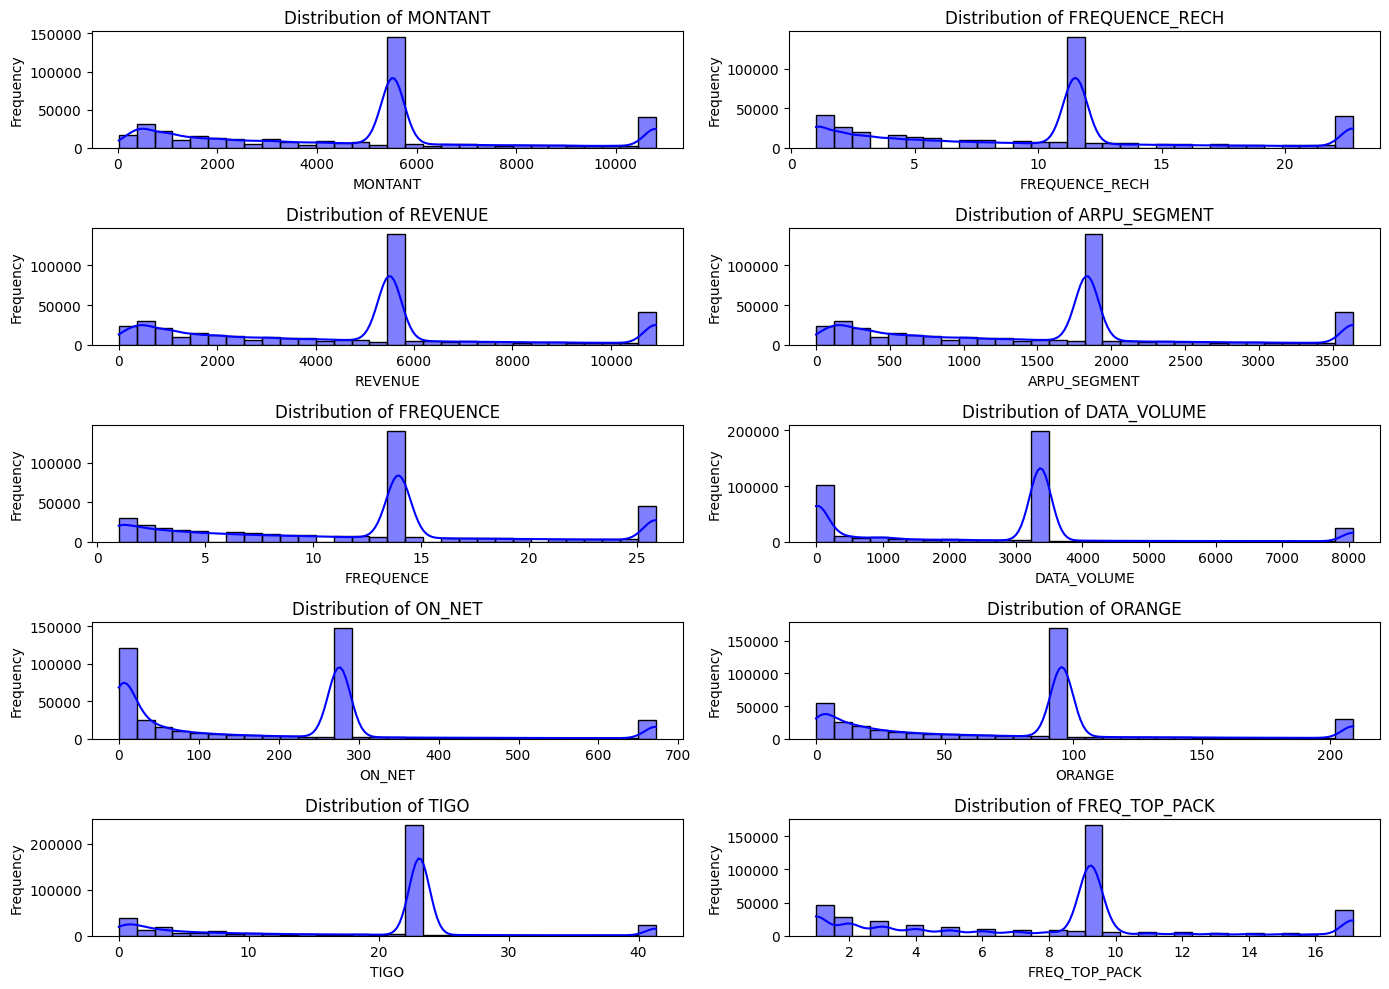

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data_capped[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




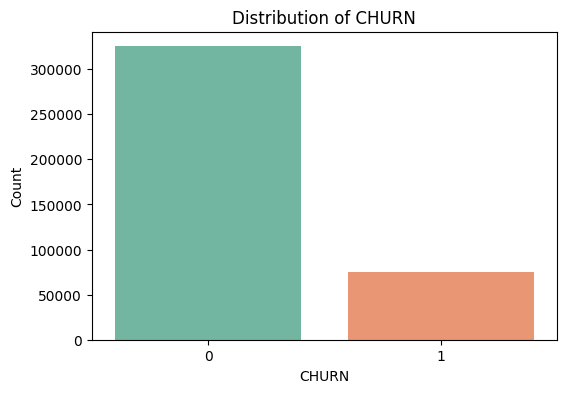

In [22]:
# Plot distribution of the CHURN variable with updated syntax
plt.figure(figsize=(6, 4))
sns.countplot(data=data_capped, x='CHURN', hue='CHURN', palette='Set2', legend=False)
plt.title('Distribution of CHURN')
plt.xlabel('CHURN')
plt.ylabel('Count')
plt.show()


In [24]:
# Save the cleaned dataset
cleaned_data_file_path = 'cleaned_data.csv'
data_capped.to_csv(cleaned_data_file_path, index=False)



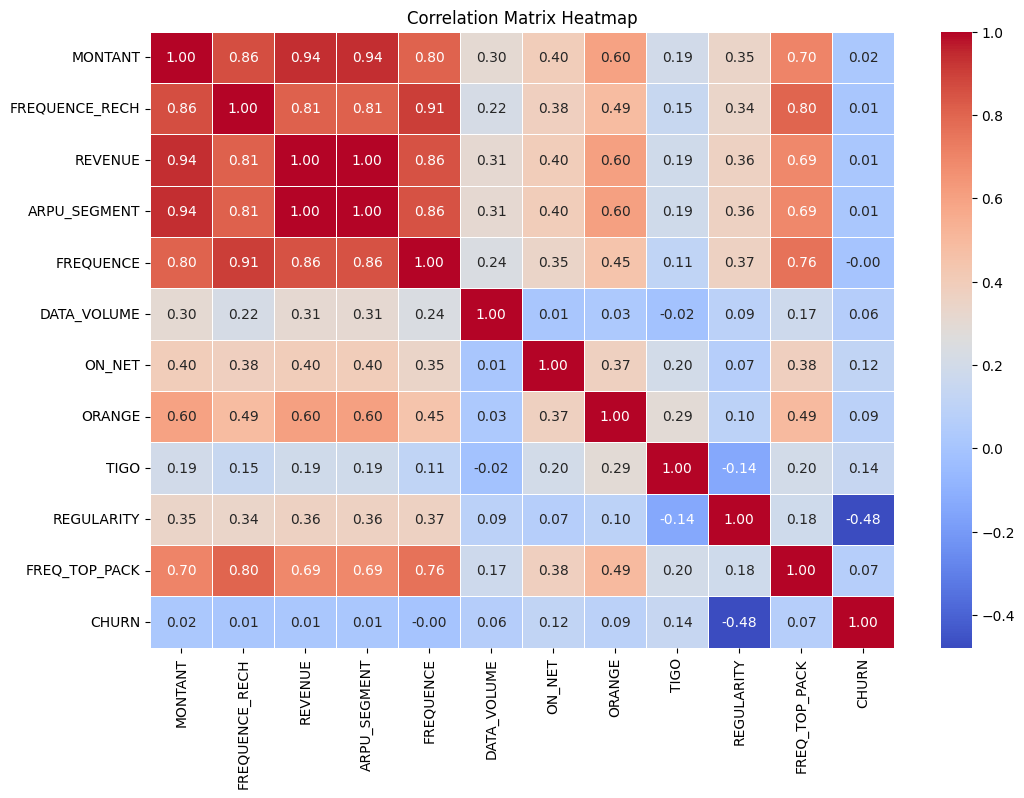

In [28]:
# Select only numeric columns
numeric_data = data_capped.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and display
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:

# Assume 'K > 24 month' means more than 24 months; simplify to numerical values
tenure_mapping = {
    'K > 24 month': 25,
    'I 18-24 month': 21,
    'H 12-18 month': 15,
    'G 9-12 month': 10.5,
    'F 6-9 month': 7.5,
    'E 3-6 month': 4.5,
    'D 1-3 month': 2,
    'C < 1 month': 0.5
}
data['TENURE_MONTHS'] = data['TENURE'].map(tenure_mapping)

# Create new feature: 'AVG_RECHARGE' which is the average amount recharged per frequency
data['AVG_RECHARGE'] = data['MONTANT'] / data['FREQUENCE_RECH']

# Create new feature: 'USAGE_RATIO' as a ratio of 'ON_NET' to 'FREQUENCE'
data['USAGE_RATIO'] = data['ON_NET'] / data['FREQUENCE']

# Replace any resulting infinite values (due to division by zero) with NaN and then fill with 0
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
data.fillna(0, inplace=True)

# Perform one-hot encoding on the categorical columns
categorical_columns = ['REGION', 'MRG', 'TOP_PACK', 'TENURE']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows to verify the feature engineering process
data_encoded.head()


,user_id,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,10807.428366,22.759332,10913.719393,3638.419146,25.879587,3369.763441,97.0,208.832318,6.000000,...,False,False,False,False,False,False,False,False,False,True
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,4300.000000,22.759332,4427.000000,1476.000000,25.879587,1764.000000,8.0,3.000000,0.000000,...,False,False,False,False,False,False,False,False,False,True
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,1500.000000,3.000000,1500.000000,500.000000,3.000000,3369.763441,30.0,30.000000,23.134608,...,False,False,False,False,False,False,False,False,False,True
3,f467cdb6669818373c26c2bad44e01ba66f97d21,1500.000000,3.000000,2497.000000,832.000000,4.000000,0.000000,159.0,45.000000,19.000000,...,False,False,False,False,False,False,False,False,False,True
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,5522.971346,11.503733,498.000000,166.000000,3.000000,1.000000,1.0,3.000000,23.134608,...,False,False,False,False,False,False,False,False,False,True


In [44]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_encoded.drop(columns=['CHURN', 'user_id'])
y = data_encoded['CHURN']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(f"Accuracy: {accuracy}")


[[59844  5187]
 [ 4771 10198]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     65031
           1       0.66      0.68      0.67     14969

    accuracy                           0.88     80000
   macro avg       0.79      0.80      0.80     80000
weighted avg       0.88      0.88      0.88     80000

Accuracy: 0.875525


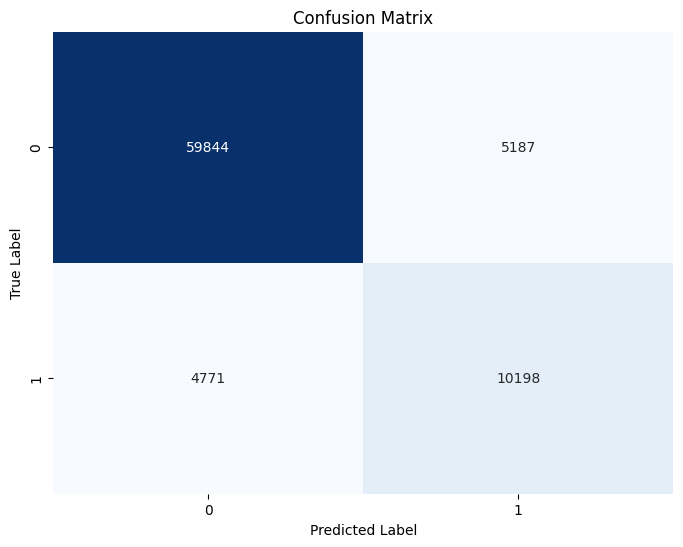

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot the confusion matrix manually
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


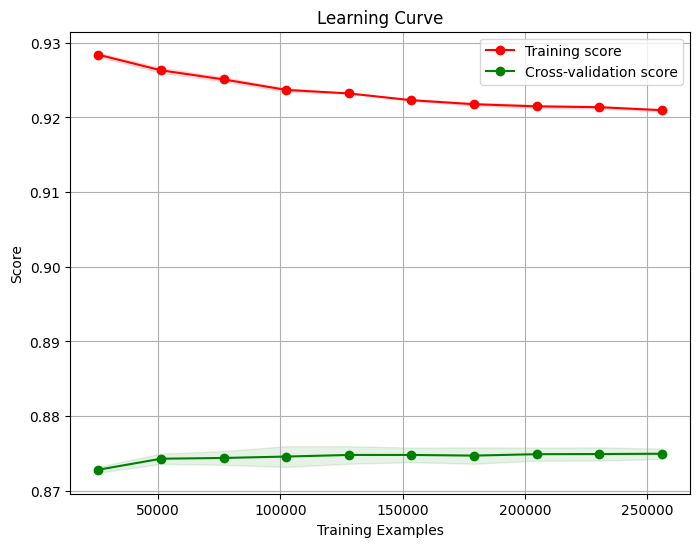

In [56]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [57]:
# Calculate training accuracy
train_accuracy = rf_model.score(X_train, y_train)

# Calculate test accuracy
test_accuracy = rf_model.score(X_test, y_test)

# Plot the results
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.